In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.DiGraph()

In [3]:
G.add_edge(1, 2)
G.add_edge(2, 3)
G.nodes, G.edges

(NodeView((1, 2, 3)), OutEdgeView([(1, 2), (2, 3)]))

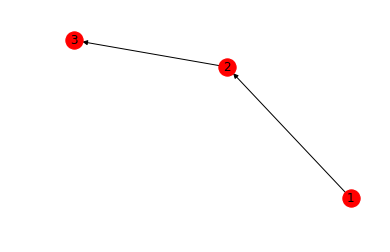

In [4]:
plt.axis('off')
nx.draw_networkx(G)

In [5]:
2 not in G.nodes

False

In [6]:
(1, 2) in G.edges

True

In [7]:
(1, 3) in G.edges

False

In [8]:
xml_file_path = 'data/countries_1.xml'

In [9]:
with open(xml_file_path) as xml_file:
    xml_string = xml_file.read()
xml_string[:100]

'<items><item><name>Aruba,Aruba,Aruba,Aruba,Aruba,Aruba</name><tld>.aw</tld><cca2>AW</cca2><ccn3>533.'

In [10]:
from xml.etree import ElementTree as ET
xml_tree = ET.fromstring(xml_string)
xml_tree

<Element 'items' at 0x7f8d719127c8>

In [11]:
xml_tree.tag

'items'

In [12]:
xml_tree.attrib

{}

In [13]:
[c.tag for c in xml_tree.getchildren()][:10]

['item',
 'item',
 'item',
 'item',
 'item',
 'item',
 'item',
 'item',
 'item',
 'item']

In [15]:
def _recurse(Graph, node):
    tag = node.tag
    if tag not in Graph.nodes:
        Graph.add_node(tag)
    for attribute in node.attrib.keys():
        if (node.tag, attribute) not in Graph.edges:
            Graph.add_edge(node.tag, attribute, type='attribute')
    for child in node.getchildren():
        if (node.tag, child.tag) not in Graph.edges:
            Graph.add_edge(node.tag, child.tag, type='child')
        _recurse(Graph, child)
def generate_graph(xml_string):
    G = nx.DiGraph()
    xml_tree = ET.fromstring(xml_string)
    _recurse(G, xml_tree)
    return G

In [16]:
def display_graph(G):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    nx.draw_networkx(G)

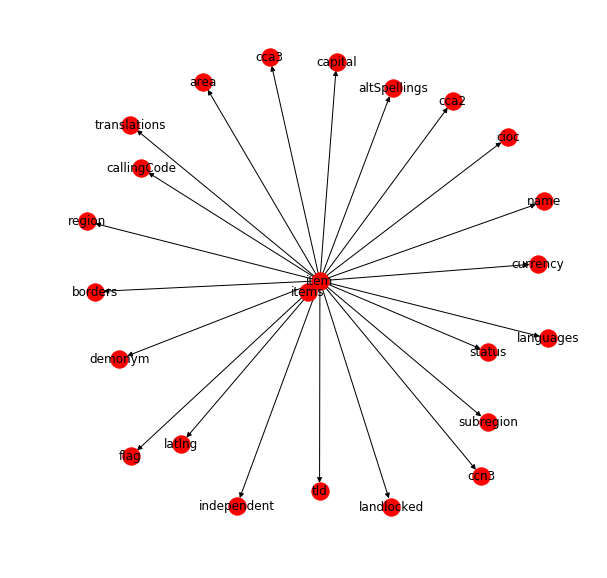

In [17]:
G = generate_graph(xml_string)
display_graph(G)

In [18]:
G.nodes

NodeView(('items', 'item', 'name', 'tld', 'cca2', 'ccn3', 'cca3', 'cioc', 'independent', 'status', 'currency', 'callingCode', 'capital', 'altSpellings', 'region', 'subregion', 'languages', 'translations', 'latlng', 'demonym', 'landlocked', 'borders', 'area', 'flag'))

In [19]:
G.edges

OutEdgeView([('items', 'item'), ('item', 'name'), ('item', 'tld'), ('item', 'cca2'), ('item', 'ccn3'), ('item', 'cca3'), ('item', 'cioc'), ('item', 'independent'), ('item', 'status'), ('item', 'currency'), ('item', 'callingCode'), ('item', 'capital'), ('item', 'altSpellings'), ('item', 'region'), ('item', 'subregion'), ('item', 'languages'), ('item', 'translations'), ('item', 'latlng'), ('item', 'demonym'), ('item', 'landlocked'), ('item', 'borders'), ('item', 'area'), ('item', 'flag')])

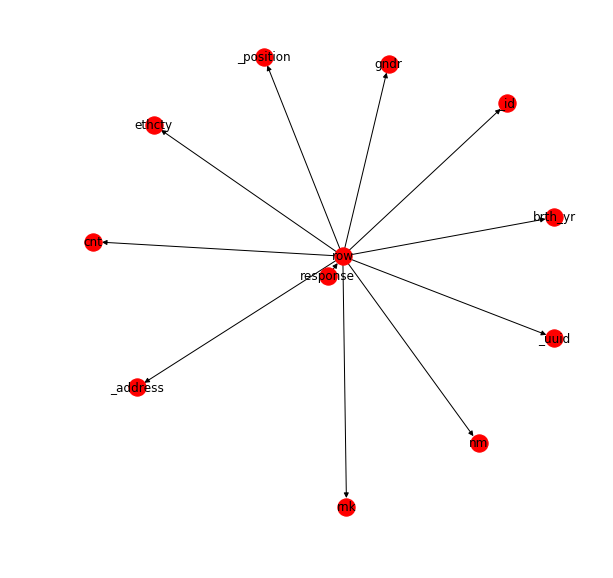

In [20]:
with open('Data/babyNames.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)

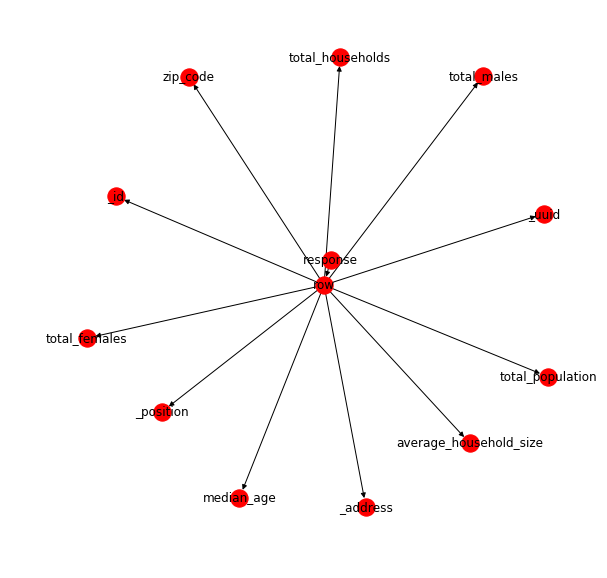

In [21]:
with open('Data/Cencus.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)

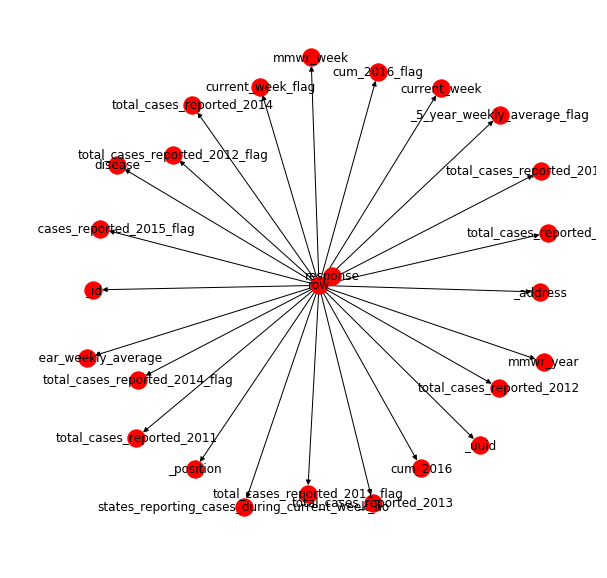

In [22]:
with open('Data/disease.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)